In [1]:
import json
import pprint
import pandas as pd
import io
import yaml

!pip install numpy==1.16.1
import numpy as np

In [18]:

'''import sys
reload(sys)
sys.setdefaultencoding('utf-8')'''

'''def _decode_dict(data):
    rv = {}
    for key, value in data.iteritems():
        if isinstance(key, unicode):
            key = key.encode('utf-8')
        if isinstance(value, unicode):
            value = value.encode('utf-8')
        elif isinstance(value, list):
            value = _decode_list(value)
        elif isinstance(value, dict):
            value = _decode_dict(value)
        rv[key] = value
    return rv
def _decode_list(data):
    rv = []
    for item in data:
        if isinstance(item, unicode):
            item = item.encode('utf-8')
        elif isinstance(item, list):
            item = _decode_list(item)
        elif isinstance(item, dict):
            item = _decode_dict(item)
        rv.append(item)
    return rv'''

def parser(file_path):
    with io.open(file_path, encoding='utf-8') as f:
        #io.open(f, encoding='utf-8-sig')
        #raw_data = yaml.safe_load(f)
        raw_data = json.load(f, encoding ='utf-8')
        #raw_data = json.load(f, object_hook=_decode_dict)
    return raw_data



In [19]:
raw_data = parser('clip_226.json')
raw_data

{'clip_id': '226',
 'actor': {'11': {'age': 59, 'gender': '남성'},
  '12': {'age': 33, 'gender': '여성'}},
 'nr_frame': '2010',
 'video_size': {'width': '1920', 'height': '1080'},
 'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. 안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
 'data': {'140': {'1': {'label': '사람',
    'frame': '140',
    'xtl': '855.79',
    'ytl': '335.31',
    'xbr': '1306.01',
    'ybr': '978.11',
    'position': {},
    'predicate': {},
    'person_id': '11'}},
  '141': {'1': {'label': '사람',
    'frame': '141',
    'xtl': '855.79',
    'ytl': '333.23',
    'xbr': '1306.01',
    'ybr': '978.11',
    'position': {},
    'predicate': {},
    'person_id': '11'}},
  '142': {'1': {'label': '사람',
    'frame': '142',
    'xtl': '855.79',
    'ytl': '331.15',
    'xbr': '1306.01',
    'ybr': '978.11',
    'position': {},
    'predicate': {},
    'person_id': '11'}},
  '143': {'1': {'label': '사람',
    'frame': '143',
    'xtl': '855.79',
    'ytl': '329.07'

In [31]:
columns = ['clip_id', 'nr_frame', 'script', 'script_start', 'script_end', 'sound_emotion', 'sound_arousal', 'sound_valence']
df = pd.DataFrame(columns=columns)
df

Empty DataFrame
Columns: [clip_id, nr_frame, script, script_start, script_end, sound_emotion, sound_arousal, sound_valence]
Index: []

In [32]:
info = {}

temp = set()

data = raw_data['data']

sound_flag = False
text_flag = False

for i in data:
    info[i] = {}
    info[i]['clip_id'] = raw_data['clip_id']
    info[i]['nr_frame'] = raw_data['nr_frame']
    info[i]['situation'] = raw_data['situation']

    for j in data[i].keys(): # j can be '1' or '2'
        if 'emotion' in data[i][j]:
            emotion = data[i][j]['emotion']
#             print(emotion)
            if 'sound' in emotion:
                info[i]['sound_arousal'] = emotion['sound']['arousal']
                info[i]['sound_emotion'] = emotion['sound']['emotion']
                info[i]['sound_valence'] = emotion['sound']['valence']
#                 sound_flag = True
        if 'text' in data[i][j]:
            info[i]['script'] = data[i][j]['text']['script']
            info[i]['script_start'] = data[i][j]['text']['script_start']
            info[i]['script_end'] = data[i][j]['text']['script_end']
#             text_flag = True

#         if sound_flag and text_flag:
#             break
#     if sound_flag and text_flag:
# #         break
pprint.pprint(info)

{'1000': {'clip_id': '226',
          'nr_frame': '2010',
          'script': '많이 안 좋으세요?',
          'script_end': 1012,
          'script_start': 941,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 2.0,
          'sound_emotion': 'fear',
          'sound_valence': 4.0},
 '1001': {'clip_id': '226',
          'nr_frame': '2010',
          'script': '많이 안 좋으세요?',
          'script_end': 1012,
          'script_start': 941,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 2.0,
          'sound_emotion': 'fear',
          'sound_valence': 4.0},
 '1002': {'clip_id': '226',
          'nr_frame': '2010',
          'script': '많이 안 좋으세요?',
          'script_end': 1012,
          'script_start': 941,
          'situation': '까페. 오랜만에 

          'script': '급하게 재수술을 하게 되었는데. 아직 경과를 보고 있어요. 지나가다가 보였는데 괜히 마음이 쓰여서 '
                    '들어와봤지요.',
          'script_end': 1334,
          'script_start': 1039,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 3.0,
          'sound_emotion': 'sad',
          'sound_valence': 3.0},
 '1146': {'clip_id': '226',
          'nr_frame': '2010',
          'script': '급하게 재수술을 하게 되었는데. 아직 경과를 보고 있어요. 지나가다가 보였는데 괜히 마음이 쓰여서 '
                    '들어와봤지요.',
          'script_end': 1334,
          'script_start': 1039,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 3.0,
          'sound_emotion': 'sad',
          'sound_valence': 3.0},
 '1147': {'clip_id': '226',
          'nr_frame': '2010',
          'script': '급하게 재수술을 하게 되었는

          'sound_emotion': 'sad',
          'sound_valence': 3.0},
 '1257': {'clip_id': '226',
          'nr_frame': '2010',
          'script': '급하게 재수술을 하게 되었는데. 아직 경과를 보고 있어요. 지나가다가 보였는데 괜히 마음이 쓰여서 '
                    '들어와봤지요.',
          'script_end': 1334,
          'script_start': 1039,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 3.0,
          'sound_emotion': 'sad',
          'sound_valence': 3.0},
 '1258': {'clip_id': '226',
          'nr_frame': '2010',
          'script': '급하게 재수술을 하게 되었는데. 아직 경과를 보고 있어요. 지나가다가 보였는데 괜히 마음이 쓰여서 '
                    '들어와봤지요.',
          'script_end': 1334,
          'script_start': 1039,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 3.0,
          'sound_emotion': 'sad',
  

 '1370': {'clip_id': '226',
          'nr_frame': '2010',
          'script': '쾌차하시길 빌게요.',
          'script_end': 1426,
          'script_start': 1334,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 1.0,
          'sound_emotion': 'neu',
          'sound_valence': 5.0},
 '1371': {'clip_id': '226',
          'nr_frame': '2010',
          'script': '쾌차하시길 빌게요.',
          'script_end': 1426,
          'script_start': 1334,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 1.0,
          'sound_emotion': 'neu',
          'sound_valence': 5.0},
 '1372': {'clip_id': '226',
          'nr_frame': '2010',
          'script': '쾌차하시길 빌게요.',
          'script_end': 1426,
          'script_start': 1334,
          'situation': '까페. 오랜만에

 '1503': {'clip_id': '226',
          'nr_frame': '2010',
          'script': '젊은 사람이 마음도 좋지.',
          'script_end': 1528,
          'script_start': 1441,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 3.0,
          'sound_emotion': 'hap',
          'sound_valence': 7.0},
 '1504': {'clip_id': '226',
          'nr_frame': '2010',
          'script': '젊은 사람이 마음도 좋지.',
          'script_end': 1528,
          'script_start': 1441,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 3.0,
          'sound_emotion': 'hap',
          'sound_valence': 7.0},
 '1505': {'clip_id': '226',
          'nr_frame': '2010',
          'script': '젊은 사람이 마음도 좋지.',
          'script_end': 1528,
          'script_start': 1441,
          'situation

          'sound_valence': 5.0},
 '1626': {'clip_id': '226',
          'nr_frame': '2010',
          'script': '아직 주문 안하셨죠? 오늘 제가 음료 서비스로 내어드릴게요.',
          'script_end': 1698,
          'script_start': 1528,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 1.0,
          'sound_emotion': 'neu',
          'sound_valence': 5.0},
 '1627': {'clip_id': '226',
          'nr_frame': '2010',
          'script': '아직 주문 안하셨죠? 오늘 제가 음료 서비스로 내어드릴게요.',
          'script_end': 1698,
          'script_start': 1528,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 1.0,
          'sound_emotion': 'neu',
          'sound_valence': 5.0},
 '1628': {'clip_id': '226',
          'nr_frame': '2010',
          'script': '아직 주문 안하셨죠? 오늘 제가 음료 서비스로 내어

 '175': {'clip_id': '226',
         'nr_frame': '2010',
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.'},
 '1750': {'clip_id': '226',
          'nr_frame': '2010',
          'script': '받아 주셨으면 좋겠어요. 마음이 쓰여서요.',
          'script_end': 1798,
          'script_start': 1742,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 1.0,
          'sound_emotion': 'neu',
          'sound_valence': 5.0},
 '1751': {'clip_id': '226',
          'nr_frame': '2010',
          'script': '받아 주셨으면 좋겠어요. 마음이 쓰여서요.',
          'script_end': 1798,
          'script_start': 1742,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 1.0,
          'sound_e

 '1864': {'clip_id': '226',
          'nr_frame': '2010',
          'script': '그러면 뭐. 네. 고마워요.',
          'script_end': 1918,
          'script_start': 1798,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 4.0,
          'sound_emotion': 'hap',
          'sound_valence': 7.0},
 '1865': {'clip_id': '226',
          'nr_frame': '2010',
          'script': '그러면 뭐. 네. 고마워요.',
          'script_end': 1918,
          'script_start': 1798,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 4.0,
          'sound_emotion': 'hap',
          'sound_valence': 7.0},
 '1866': {'clip_id': '226',
          'nr_frame': '2010',
          'script': '그러면 뭐. 네. 고마워요.',
          'script_end': 1918,
          'script_start': 1798,
          'situat

         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.'},
 '270': {'clip_id': '226',
         'nr_frame': '2010',
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.'},
 '271': {'clip_id': '226',
         'nr_frame': '2010',
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.'},
 '272': {'clip_id': '226',
         'nr_frame': '2010',
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.'},
 '273': {'clip_id': '226',
         'nr_frame': '2010',
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.'},
 '274': {'c

         'nr_frame': '2010',
         'script': '네. 안녕하세요. 오랜만이죠?',
         'script_end': 484,
         'script_start': 380,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
         'sound_arousal': 6.0,
         'sound_emotion': 'hap',
         'sound_valence': 7.0},
 '413': {'clip_id': '226',
         'nr_frame': '2010',
         'script': '네. 안녕하세요. 오랜만이죠?',
         'script_end': 484,
         'script_start': 380,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
         'sound_arousal': 6.0,
         'sound_emotion': 'hap',
         'sound_valence': 7.0},
 '414': {'clip_id': '226',
         'nr_frame': '2010',
         'script': '네. 안녕하세요. 오랜만이죠?',
         'script_end': 484,
         'script_start': 380,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기

         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
         'sound_arousal': 5.0,
         'sound_emotion': 'hap',
         'sound_valence': 7.0},
 '555': {'clip_id': '226',
         'nr_frame': '2010',
         'script': '(@상황; 활짝 웃으며) 네. 그때 아내 분이랑…오신다고 하셨는데… 오늘도 혼자 오셨나봐요.',
         'script_end': 581,
         'script_start': 513,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
         'sound_arousal': 5.0,
         'sound_emotion': 'hap',
         'sound_valence': 7.0},
 '556': {'clip_id': '226',
         'nr_frame': '2010',
         'script': '(@상황; 활짝 웃으며) 네. 그때 아내 분이랑…오신다고 하셨는데… 오늘도 혼자 오셨나봐요.',
         'script_end': 581,
         'script_start': 513,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 

         'sound_valence': 4.0},
 '705': {'clip_id': '226',
         'nr_frame': '2010',
         'script': '그러게요. 집사람이 갑자기 또 안 좋아져서.',
         'script_end': 787,
         'script_start': 629,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
         'sound_arousal': 6.0,
         'sound_emotion': 'sad',
         'sound_valence': 4.0},
 '706': {'clip_id': '226',
         'nr_frame': '2010',
         'script': '그러게요. 집사람이 갑자기 또 안 좋아져서.',
         'script_end': 787,
         'script_start': 629,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
         'sound_arousal': 6.0,
         'sound_emotion': 'sad',
         'sound_valence': 4.0},
 '707': {'clip_id': '226',
         'nr_frame': '2010',
         'script': '그러게요. 집사람이 갑자기 또 안 좋아져서.',
         'script_end': 787,
         'script_st

         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
         'sound_arousal': 7.0,
         'sound_emotion': 'sad',
         'sound_valence': 3.0},
 '845': {'clip_id': '226',
         'nr_frame': '2010',
         'script': '어머…죄송해요.',
         'script_end': 859,
         'script_start': 787,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
         'sound_arousal': 7.0,
         'sound_emotion': 'sad',
         'sound_valence': 3.0},
 '846': {'clip_id': '226',
         'nr_frame': '2010',
         'script': '어머…죄송해요.',
         'script_end': 859,
         'script_start': 787,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
         'sound_arousal': 7.0,
         'sound_emotion': 'sad'

         'script_start': 941,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
         'sound_arousal': 2.0,
         'sound_emotion': 'fear',
         'sound_valence': 4.0},
 '974': {'clip_id': '226',
         'nr_frame': '2010',
         'script': '많이 안 좋으세요?',
         'script_end': 1012,
         'script_start': 941,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
         'sound_arousal': 2.0,
         'sound_emotion': 'fear',
         'sound_valence': 4.0},
 '975': {'clip_id': '226',
         'nr_frame': '2010',
         'script': '많이 안 좋으세요?',
         'script_end': 1012,
         'script_start': 941,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
         'sound_arousal'

In [33]:
for i in info.keys():
#     print(info[i])
    try:
        info[i]['frame'] = i
#         print(type(info[i]['frame']))
    except:
        print(type(i))
    df = df.append(info[i], ignore_index=True)
pprint.pprint(info)

{'1000': {'clip_id': '226',
          'frame': '1000',
          'nr_frame': '2010',
          'script': '많이 안 좋으세요?',
          'script_end': 1012,
          'script_start': 941,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 2.0,
          'sound_emotion': 'fear',
          'sound_valence': 4.0},
 '1001': {'clip_id': '226',
          'frame': '1001',
          'nr_frame': '2010',
          'script': '많이 안 좋으세요?',
          'script_end': 1012,
          'script_start': 941,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 2.0,
          'sound_emotion': 'fear',
          'sound_valence': 4.0},
 '1002': {'clip_id': '226',
          'frame': '1002',
          'nr_frame': '2010',
          'script': '많이 안 좋으세요?',
          'sc

          'nr_frame': '2010',
          'script': '급하게 재수술을 하게 되었는데. 아직 경과를 보고 있어요. 지나가다가 보였는데 괜히 마음이 쓰여서 '
                    '들어와봤지요.',
          'script_end': 1334,
          'script_start': 1039,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 3.0,
          'sound_emotion': 'sad',
          'sound_valence': 3.0},
 '1139': {'clip_id': '226',
          'frame': '1139',
          'nr_frame': '2010',
          'script': '급하게 재수술을 하게 되었는데. 아직 경과를 보고 있어요. 지나가다가 보였는데 괜히 마음이 쓰여서 '
                    '들어와봤지요.',
          'script_end': 1334,
          'script_start': 1039,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 3.0,
          'sound_emotion': 'sad',
          'sound_valence': 3.0},
 '1140': {'clip_id': '226',
         

          'sound_emotion': 'sad',
          'sound_valence': 3.0},
 '1239': {'clip_id': '226',
          'frame': '1239',
          'nr_frame': '2010',
          'script': '급하게 재수술을 하게 되었는데. 아직 경과를 보고 있어요. 지나가다가 보였는데 괜히 마음이 쓰여서 '
                    '들어와봤지요.',
          'script_end': 1334,
          'script_start': 1039,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 3.0,
          'sound_emotion': 'sad',
          'sound_valence': 3.0},
 '1240': {'clip_id': '226',
          'frame': '1240',
          'nr_frame': '2010',
          'script': '급하게 재수술을 하게 되었는데. 아직 경과를 보고 있어요. 지나가다가 보였는데 괜히 마음이 쓰여서 '
                    '들어와봤지요.',
          'script_end': 1334,
          'script_start': 1039,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sou

                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 1.0,
          'sound_emotion': 'neu',
          'sound_valence': 5.0},
 '1357': {'clip_id': '226',
          'frame': '1357',
          'nr_frame': '2010',
          'script': '쾌차하시길 빌게요.',
          'script_end': 1426,
          'script_start': 1334,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 1.0,
          'sound_emotion': 'neu',
          'sound_valence': 5.0},
 '1358': {'clip_id': '226',
          'frame': '1358',
          'nr_frame': '2010',
          'script': '쾌차하시길 빌게요.',
          'script_end': 1426,
          'script_start': 1334,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 1.0,
          'sound_emotion': 

          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 3.0,
          'sound_emotion': 'hap',
          'sound_valence': 7.0},
 '1481': {'clip_id': '226',
          'frame': '1481',
          'nr_frame': '2010',
          'script': '젊은 사람이 마음도 좋지.',
          'script_end': 1528,
          'script_start': 1441,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 3.0,
          'sound_emotion': 'hap',
          'sound_valence': 7.0},
 '1482': {'clip_id': '226',
          'frame': '1482',
          'nr_frame': '2010',
          'script': '젊은 사람이 마음도 좋지.',
          'script_end': 1528,
          'script_start': 1441,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스

          'script_start': 1528,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 1.0,
          'sound_emotion': 'neu',
          'sound_valence': 5.0},
 '1592': {'clip_id': '226',
          'frame': '1592',
          'nr_frame': '2010',
          'script': '아직 주문 안하셨죠? 오늘 제가 음료 서비스로 내어드릴게요.',
          'script_end': 1698,
          'script_start': 1528,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 1.0,
          'sound_emotion': 'neu',
          'sound_valence': 5.0},
 '1593': {'clip_id': '226',
          'frame': '1593',
          'nr_frame': '2010',
          'script': '아직 주문 안하셨죠? 오늘 제가 음료 서비스로 내어드릴게요.',
          'script_end': 1698,
          'script_start': 1528,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은

 '1701': {'clip_id': '226',
          'frame': '1701',
          'nr_frame': '2010',
          'script': '아니에요. 그럴거 없어요.',
          'script_end': 1742,
          'script_start': 1698,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 2.0,
          'sound_emotion': 'sur',
          'sound_valence': 6.0},
 '1702': {'clip_id': '226',
          'frame': '1702',
          'nr_frame': '2010',
          'script': '아니에요. 그럴거 없어요.',
          'script_end': 1742,
          'script_start': 1698,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 2.0,
          'sound_emotion': 'sur',
          'sound_valence': 6.0},
 '1703': {'clip_id': '226',
          'frame': '1703',
          'nr_frame': '2010',
          'script': '아니에요. 그럴거 없어요.',
 

          'frame': '1812',
          'nr_frame': '2010',
          'script': '그러면 뭐. 네. 고마워요.',
          'script_end': 1918,
          'script_start': 1798,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 4.0,
          'sound_emotion': 'hap',
          'sound_valence': 7.0},
 '1813': {'clip_id': '226',
          'frame': '1813',
          'nr_frame': '2010',
          'script': '그러면 뭐. 네. 고마워요.',
          'script_end': 1918,
          'script_start': 1798,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 4.0,
          'sound_emotion': 'hap',
          'sound_valence': 7.0},
 '1814': {'clip_id': '226',
          'frame': '1814',
          'nr_frame': '2010',
          'script': '그러면 뭐. 네. 고마워요.',
          'script_end': 19

          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 4.0,
          'sound_emotion': 'hap',
          'sound_valence': 7.0},
 '1918': {'clip_id': '226',
          'frame': '1918',
          'nr_frame': '2010',
          'script': '그러면 뭐. 네. 고마워요.',
          'script_end': 1918,
          'script_start': 1798,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 4.0,
          'sound_emotion': 'hap',
          'sound_valence': 7.0},
 '1919': {'clip_id': '226',
          'frame': '1919',
          'nr_frame': '2010',
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.'},
 '192': {'clip_id': '226',
         'frame': '192',
         'nr_fra

 '330': {'clip_id': '226',
         'frame': '330',
         'nr_frame': '2010',
         'script': '앗. 오랜만에 오셨네요.',
         'script_end': 380,
         'script_start': 321,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
         'sound_arousal': 6.0,
         'sound_emotion': 'hap',
         'sound_valence': 7.0},
 '331': {'clip_id': '226',
         'frame': '331',
         'nr_frame': '2010',
         'script': '앗. 오랜만에 오셨네요.',
         'script_end': 380,
         'script_start': 321,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
         'sound_arousal': 6.0,
         'sound_emotion': 'hap',
         'sound_valence': 7.0},
 '332': {'clip_id': '226',
         'frame': '332',
         'nr_frame': '2010',
         'script': '앗. 오랜만에 오셨네요.',
         'script_end': 380,
         

         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
         'sound_arousal': 6.0,
         'sound_emotion': 'hap',
         'sound_valence': 7.0},
 '447': {'clip_id': '226',
         'frame': '447',
         'nr_frame': '2010',
         'script': '네. 안녕하세요. 오랜만이죠?',
         'script_end': 484,
         'script_start': 380,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
         'sound_arousal': 6.0,
         'sound_emotion': 'hap',
         'sound_valence': 7.0},
 '448': {'clip_id': '226',
         'frame': '448',
         'nr_frame': '2010',
         'script': '네. 안녕하세요. 오랜만이죠?',
         'script_end': 484,
         'script_start': 380,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다

         'script_end': 581,
         'script_start': 513,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
         'sound_arousal': 5.0,
         'sound_emotion': 'hap',
         'sound_valence': 7.0},
 '579': {'clip_id': '226',
         'frame': '579',
         'nr_frame': '2010',
         'script': '(@상황; 활짝 웃으며) 네. 그때 아내 분이랑…오신다고 하셨는데… 오늘도 혼자 오셨나봐요.',
         'script_end': 581,
         'script_start': 513,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
         'sound_arousal': 5.0,
         'sound_emotion': 'hap',
         'sound_valence': 7.0},
 '580': {'clip_id': '226',
         'frame': '580',
         'nr_frame': '2010',
         'script': '(@상황; 활짝 웃으며) 네. 그때 아내 분이랑…오신다고 하셨는데… 오늘도 혼자 오셨나봐요.',
         'script_end': 581,
         'script_start': 513,
         'situation'

         'sound_valence': 4.0},
 '715': {'clip_id': '226',
         'frame': '715',
         'nr_frame': '2010',
         'script': '그러게요. 집사람이 갑자기 또 안 좋아져서.',
         'script_end': 787,
         'script_start': 629,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
         'sound_arousal': 6.0,
         'sound_emotion': 'sad',
         'sound_valence': 4.0},
 '716': {'clip_id': '226',
         'frame': '716',
         'nr_frame': '2010',
         'script': '그러게요. 집사람이 갑자기 또 안 좋아져서.',
         'script_end': 787,
         'script_start': 629,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
         'sound_arousal': 6.0,
         'sound_emotion': 'sad',
         'sound_valence': 4.0},
 '717': {'clip_id': '226',
         'frame': '717',
         'nr_frame': '2010',
         'script': 

         'sound_arousal': 7.0,
         'sound_emotion': 'sad',
         'sound_valence': 3.0},
 '828': {'clip_id': '226',
         'frame': '828',
         'nr_frame': '2010',
         'script': '어머…죄송해요.',
         'script_end': 859,
         'script_start': 787,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
         'sound_arousal': 7.0,
         'sound_emotion': 'sad',
         'sound_valence': 3.0},
 '829': {'clip_id': '226',
         'frame': '829',
         'nr_frame': '2010',
         'script': '어머…죄송해요.',
         'script_end': 859,
         'script_start': 787,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
         'sound_arousal': 7.0,
         'sound_emotion': 'sad',
         'sound_valence': 3.0},
 '830': {'clip_id': '226',
         'frame': '830',
         'nr_fra

 '886': {'clip_id': '226',
         'frame': '886',
         'nr_frame': '2010',
         'script': '(@상황; 손사래 치며) 어휴. 아가씨가 왜 죄송해.',
         'script_end': 941,
         'script_start': 870,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
         'sound_arousal': 1.0,
         'sound_emotion': 'neu',
         'sound_valence': 5.0},
 '887': {'clip_id': '226',
         'frame': '887',
         'nr_frame': '2010',
         'script': '(@상황; 손사래 치며) 어휴. 아가씨가 왜 죄송해.',
         'script_end': 941,
         'script_start': 870,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
         'sound_arousal': 1.0,
         'sound_emotion': 'neu',
         'sound_valence': 5.0},
 '888': {'clip_id': '226',
         'frame': '888',
         'nr_frame': '2010',
         'script': '(@상황; 손사래 치며) 어휴. 아가씨

                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
         'sound_arousal': 2.0,
         'sound_emotion': 'fear',
         'sound_valence': 4.0},
 '986': {'clip_id': '226',
         'frame': '986',
         'nr_frame': '2010',
         'script': '많이 안 좋으세요?',
         'script_end': 1012,
         'script_start': 941,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
         'sound_arousal': 2.0,
         'sound_emotion': 'fear',
         'sound_valence': 4.0},
 '987': {'clip_id': '226',
         'frame': '987',
         'nr_frame': '2010',
         'script': '많이 안 좋으세요?',
         'script_end': 1012,
         'script_start': 941,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
         'sound_arousal': 2.0,
         'sound_emotion': 'fear',
         'sound_val

In [34]:
df

clip_id nr_frame script script_start script_end sound_emotion  \
0        226     2010    NaN          NaN        NaN           NaN   
1        226     2010    NaN          NaN        NaN           NaN   
2        226     2010    NaN          NaN        NaN           NaN   
3        226     2010    NaN          NaN        NaN           NaN   
4        226     2010    NaN          NaN        NaN           NaN   
5        226     2010    NaN          NaN        NaN           NaN   
6        226     2010    NaN          NaN        NaN           NaN   
7        226     2010    NaN          NaN        NaN           NaN   
8        226     2010    NaN          NaN        NaN           NaN   
9        226     2010    NaN          NaN        NaN           NaN   
10       226     2010    NaN          NaN        NaN           NaN   
11       226     2010    NaN          NaN        NaN           NaN   
12       226     2010    NaN          NaN        NaN           NaN   
13       226     2010    NaN          NaN        NaN           NaN   
14       226     2010    NaN          NaN        NaN           NaN   
15       226     2010    NaN          NaN        NaN           NaN   
16       226     2010    NaN          NaN        NaN           NaN   
17       226     2010    NaN          NaN        NaN           NaN   
18       226     2010    NaN          NaN        NaN           NaN   
19       226     2010    NaN          NaN        NaN           NaN   
20       226     2010    NaN          NaN        NaN           NaN   
21       226     2010    NaN          NaN        NaN           NaN   
22       226     2010    NaN          NaN        NaN           NaN   
23       226     2010    NaN          NaN        NaN           NaN   
24       226     2010    NaN          NaN        NaN           NaN   
25       226     2010    NaN          NaN        NaN           NaN   
26       226     2010    NaN          NaN        NaN           NaN   
27       226     2010    NaN          NaN        NaN           NaN   
28       226     2010    NaN          NaN        NaN           NaN   
29       226     2010    NaN          NaN        NaN           NaN   
...      ...      ...    ...          ...        ...           ...   
1840     226     2010    NaN          NaN        NaN           NaN   
1841     226     2010    NaN          NaN        NaN           NaN   
1842     226     2010    NaN          NaN        NaN           NaN   
1843     226     2010    NaN          NaN        NaN           NaN   
1844     226     2010    NaN          NaN        NaN           NaN   
1845     226     2010    NaN          NaN        NaN           NaN   
1846     226     2010    NaN          NaN        NaN           NaN   
1847     226     2010    NaN          NaN        NaN           NaN   
1848     226     2010    NaN          NaN        NaN           NaN   
1849     226     2010    NaN          NaN        NaN           NaN   
1850     226     2010    NaN          NaN        NaN           NaN   
1851     226     2010    NaN          NaN        NaN           NaN   
1852     226     2010    NaN          NaN        NaN           NaN   
1853     226     2010    NaN          NaN        NaN           NaN   
1854     226     2010    NaN          NaN        NaN           NaN   
1855     226     2010    NaN          NaN        NaN           NaN   
1856     226     2010    NaN          NaN        NaN           NaN   
1857     226     2010    NaN          NaN        NaN           NaN   
1858     226     2010    NaN          NaN        NaN           NaN   
1859     226     2010    NaN          NaN        NaN           NaN   
1860     226     2010    NaN          NaN        NaN           NaN   
1861     226     2010    NaN          NaN        NaN           NaN   
1862     226     2010    NaN          NaN        NaN           NaN   
1863     226     2010    NaN          NaN        NaN           NaN   
1864     226     2010    NaN          NaN        NaN           NaN   
1865     226   

In [35]:
df[df['sound_emotion'].notnull()]

clip_id nr_frame           script script_start script_end sound_emotion  \
181      226     2010    앗. 오랜만에 오셨네요.          321        380           hap   
182      226     2010    앗. 오랜만에 오셨네요.          321        380           hap   
183      226     2010    앗. 오랜만에 오셨네요.          321        380           hap   
184      226     2010    앗. 오랜만에 오셨네요.          321        380           hap   
185      226     2010    앗. 오랜만에 오셨네요.          321        380           hap   
186      226     2010    앗. 오랜만에 오셨네요.          321        380           hap   
187      226     2010    앗. 오랜만에 오셨네요.          321        380           hap   
188      226     2010    앗. 오랜만에 오셨네요.          321        380           hap   
189      226     2010    앗. 오랜만에 오셨네요.          321        380           hap   
190      226     2010    앗. 오랜만에 오셨네요.          321        380           hap   
191      226     2010    앗. 오랜만에 오셨네요.          321        380           hap   
192      226     2010    앗. 오랜만에 오셨네요.          321        380           hap   
193      226     2010    앗. 오랜만에 오셨네요.          321        380           hap   
194      226     2010    앗. 오랜만에 오셨네요.          321        380           hap   
195      226     2010    앗. 오랜만에 오셨네요.          321        380           hap   
196      226     2010    앗. 오랜만에 오셨네요.          321        380           hap   
197      226     2010    앗. 오랜만에 오셨네요.          321        380           hap   
198      226     2010    앗. 오랜만에 오셨네요.          321        380           hap   
199      226     2010    앗. 오랜만에 오셨네요.          321        380           hap   
200      226     2010    앗. 오랜만에 오셨네요.          321        380           hap   
201      226     2010    앗. 오랜만에 오셨네요.          321        380           hap   
202      226     2010    앗. 오랜만에 오셨네요.          321        380           hap   
203      226     2010    앗. 오랜만에 오셨네요.          321        380           hap   
204      226     2010    앗. 오랜만에 오셨네요.          321        380           hap   
205      226     2010    앗. 오랜만에 오셨네요.          321        380           hap   
206      226     2010    앗. 오랜만에 오셨네요.          321        380           hap   
207      226     2010    앗. 오랜만에 오셨네요.          321        380           hap   
208      226     2010    앗. 오랜만에 오셨네요.          321        380           hap   
209      226     2010    앗. 오랜만에 오셨네요.          321        380           hap   
210      226     2010    앗. 오랜만에 오셨네요.          321        380           hap   
...      ...      ...              ...          ...        ...           ...   
1749     226     2010  그러면 뭐. 네. 고마워요.         1798       1918           hap   
1750     226     2010  그러면 뭐. 네. 고마워요.         1798       1918           hap   
1751     226     2010  그러면 뭐. 네. 고마워요.         1798       1918           hap   
1752     226     2010  그러면 뭐. 네. 고마워요.         1798       1918           hap   
1753     226     2010  그러면 뭐. 네. 고마워요.         1798       1918           hap   
1754     226     2010  그러면 뭐. 네. 고마워요.         1798       1918           hap   
1755     226     2010  그러면 뭐. 네. 고마워요.         1798       1918           hap   
1756     226     2010  그러면 뭐. 네. 고마워요.         1798       1918           hap   
1757     226     2010  그러면 뭐. 네. 고마워요.         1798       1918           hap   
1758     226     2010  그러면 뭐. 네. 고마워요.         1798       1918           hap   
1759     226     2010  그러면 뭐. 네. 고마워요.         1798       1918           hap   
1760     226     2010  그러면 뭐. 네. 고마워요.         1798       1918           hap   
1761     226     2010  그러면 뭐. 네. 고마워요.         1798       1918           hap   
1762     226     2010  그러면 뭐. 네. 고마워요.         1798       1918           hap   
1763     226     2010  그러면 뭐. 네. 고마워요.         1798       1918           hap   
1764     226     2010  그러면 뭐. 네. 고마워요.         1798       1918           hap   
1765     226     2010  그러면 뭐. 네. 고마워요.         1798       1918           hap   
1766     226     2010  그러면 뭐. 네. 고마워요.         1798       1918           hap   
1767 

In [36]:
import numpy as np
npy_save = np.array(df)
npy_save

array([['226', '2010', nan, ..., nan, '140',
        '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. 안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.'],
       ['226', '2010', nan, ..., nan, '141',
        '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. 안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.'],
       ['226', '2010', nan, ..., nan, '142',
        '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. 안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.'],
       ...,
       ['226', '2010', nan, ..., nan, '2007',
        '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. 안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.'],
       ['226', '2010', nan, ..., nan, '2008',
        '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. 안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.'],
       ['226', '2010', nan, ..., nan, '2009',
        '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. 안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.']],
      dtype=object)

In [37]:
np.save('clean_data.npy', npy_save)

In [38]:
clean_data = np.load('clean_data.npy',allow_pickle=True)

In [39]:
clean_data

array([['226', '2010', nan, ..., nan, '140',
        '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. 안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.'],
       ['226', '2010', nan, ..., nan, '141',
        '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. 안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.'],
       ['226', '2010', nan, ..., nan, '142',
        '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. 안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.'],
       ...,
       ['226', '2010', nan, ..., nan, '2007',
        '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. 안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.'],
       ['226', '2010', nan, ..., nan, '2008',
        '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. 안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.'],
       ['226', '2010', nan, ..., nan, '2009',
        '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. 안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.']],
      dtype=object)

# load and match frame

### get duration of mp4 file

In [51]:
import subprocess as sp
import json

def probe(filename):
    command = ["ffprobe",
            "-loglevel",  "quiet",
            "-print_format", "json",
             "-show_format",
             "-show_streams",
             filename
             ]

    pipe = sp.Popen(command, stdout=sp.PIPE, stderr=sp.STDOUT)
    out, err = pipe.communicate()
    return json.loads(out)

def duration(filename):
     #Video's duration in seconds, return a float number
    
    _json = probe(filename)

    if 'format' in _json:
        if 'duration' in _json['format']:
            return float(_json['format']['duration'])

    if 'streams' in _json:
        # commonly stream 0 is the video
        for s in _json['streams']:
            if 'duration' in s:
                return float(s['duration'])

    # if everything didn't happen,
    # we got here because no single 'return' in the above happen.
    raise Exception('I found no duration')

In [56]:
duration(filename='clip_226.mp4')

67.07

# After parsing

In [41]:

import os

# We'll need numpy for some mathematical operations
import numpy as np

# matplotlib for displaying the output
import matplotlib.pyplot as plt
%matplotlib inline

# and IPython.display for audio output
import IPython.display

# Librosa for audio
!pip install librosa
import librosa
# And the display module for visualization
import librosa.display

/Users/stella/google-cloud-sdk/bin:/Users/stella/anaconda3/bin:/Users/stella/anaconda2/condabin:/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin


In [123]:
clean_data = np.load('clean_data.npy',allow_pickle=True)
print(clean_data.shape)
all_real_fr_num = clean_data.shape[0] #총개수
print(all_real_fr_num)
print(clean_data[0])
all_fr_num = clean_data[0][1] #써있는전체개수
print(all_fr_num)
start_fr_num = clean_data[0][8] #시작프레임
print(start_fr_num) 

(1870, 10)
1870
['226' '2010' nan nan nan nan nan nan '140'
 '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. 안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.']
2010
140


In [42]:

audio_path = '/Users/stella/dev/korean-audio-sentiment-analysis/clip_226.mp4' #자동화
print(audio_path)
y, sr = librosa.load(audio_path)
#y, sr = librosa.load('clip_226.mp4')

/Users/stella/dev/korean-audio-sentiment-analysis/clip_226.mp4


In [161]:
print(y.shape) 
y = y.tolist()

(1478894,)


In [199]:
print(sr) #sampling rate
sr_f = float(sr)

22050.0


In [200]:
t = np.array(list(range(0,1478894,1)))
t = t*(1/sr_f)
print(t)
print(t.shape)
t = t.tolist()

[0.00000000e+00 4.53514739e-05 9.07029478e-05 ... 6.70698866e+01
 6.70699320e+01 6.70699773e+01]
(1478894,)


<function matplotlib.pyplot.show(*args, **kw)>

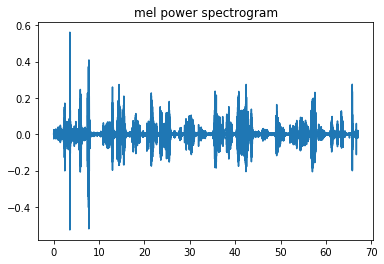

In [201]:

plt.plot(t,y)
# Put a descriptive title on the plot
plt.title('mel power spectrogram')
plt.show

In [202]:
import pandas as pd
frame_info =[]
bef_sc = ''
# frame_info : all_real_fr_num (#총개수)
# y : y.shape
#print(len(y))
#print(all_real_fr_num)
fract = len(y)/all_real_fr_num
print(fract)
for i in range(1, clean_data.shape[0]):
    now_sc = clean_data[i][2]
    if(pd.notnull(now_sc)):
        if(bef_sc!=now_sc):
            print(now_sc)
            bef_sc = now_sc
            #print((float(clean_data[i][8])- float(start_fr_num) -1))
            frame_info.append(round((float(clean_data[i][8])- float(start_fr_num) -1)*fract)) #번째 frame-> y 비율곱로 저장
            
print(frame_info) #변화되기 직전 순간이 저장됨

print(clean_data[240])
print(clean_data[241])


790.8524064171123
앗. 오랜만에 오셨네요.
네. 안녕하세요. 오랜만이죠?
(@상황; 활짝 웃으며) 네. 그때 아내 분이랑…오신다고 하셨는데… 오늘도 혼자 오셨나봐요.
그러게요. 집사람이 갑자기 또 안 좋아져서.
어머…죄송해요.
(@상황; 손사래 치며) 어휴. 아가씨가 왜 죄송해.
많이 안 좋으세요?
급하게 재수술을 하게 되었는데. 아직 경과를 보고 있어요. 지나가다가 보였는데 괜히 마음이 쓰여서 들어와봤지요.
쾌차하시길 빌게요.
젊은 사람이 마음도 좋지.
아직 주문 안하셨죠? 오늘 제가 음료 서비스로 내어드릴게요.
아니에요. 그럴거 없어요.
받아 주셨으면 좋겠어요. 마음이 쓰여서요.
그러면 뭐. 네. 고마워요.
[142353, 189805, 294197, 385936, 511682, 576531, 633473, 710185, 944278, 1028108, 1097703, 1232148, 1266946, 1311233]
['226' '2010' '앗. 오랜만에 오셨네요.' 321 380 'hap' 6.0 7.0 '380'
 '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. 안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.']
['226' '2010' '네. 안녕하세요. 오랜만이죠?' 380 484 'hap' 6.0 7.0 '381'
 '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. 안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.']


142354
47452
104392
91739
125746
64849
56942
76712
234093
83830
69595
134445
34798
44287
(128, 279)
(128, 279)
(128, 93)
(128, 93)
(128, 204)
(128, 204)
(128, 180)
(128, 180)
(128, 246)
(128, 246)
(128, 127)
(128, 127)
(128, 112)
(128, 112)
(128, 150)
(128, 150)
(128, 458)
(128, 458)
(128, 164)
(128, 164)
(128, 136)
(128, 136)
(128, 263)
(128, 263)
(128, 68)
(128, 68)
(128, 87)
(128, 87)


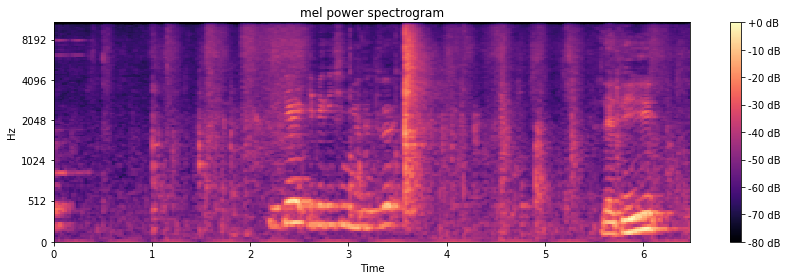

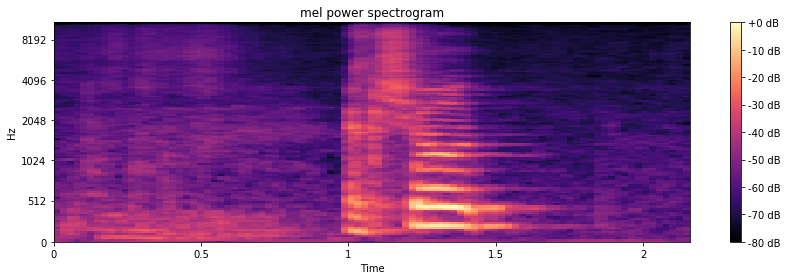

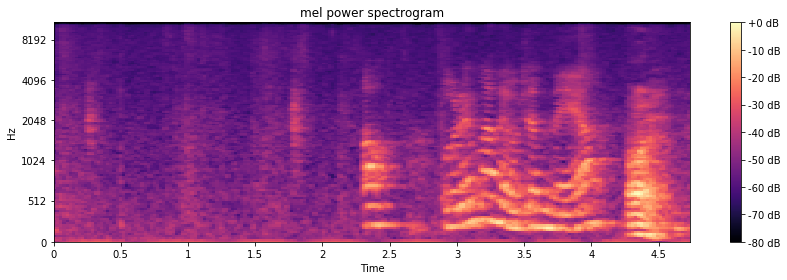

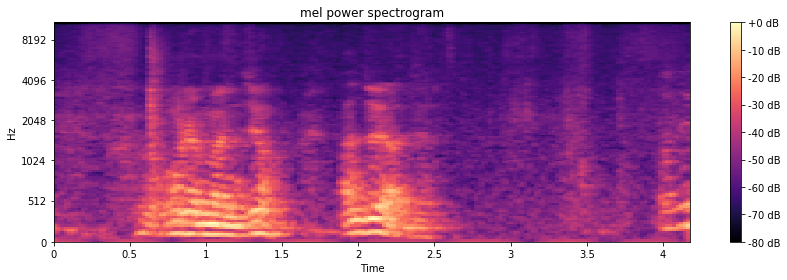

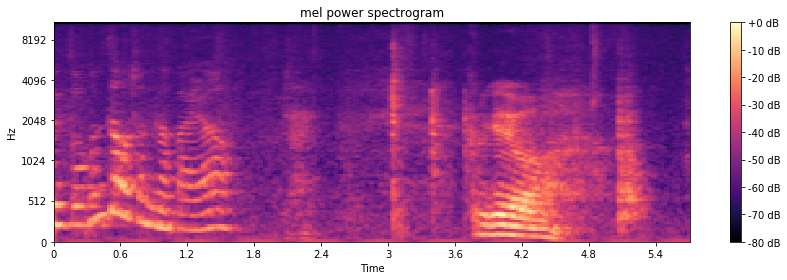

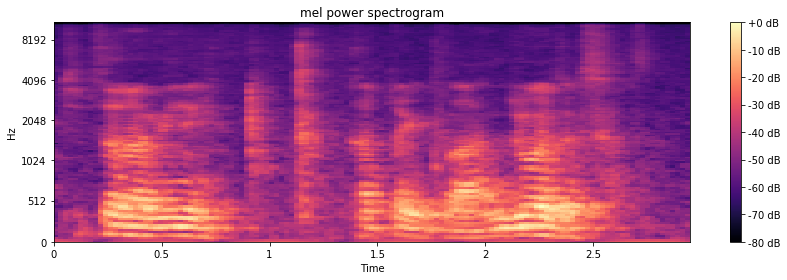

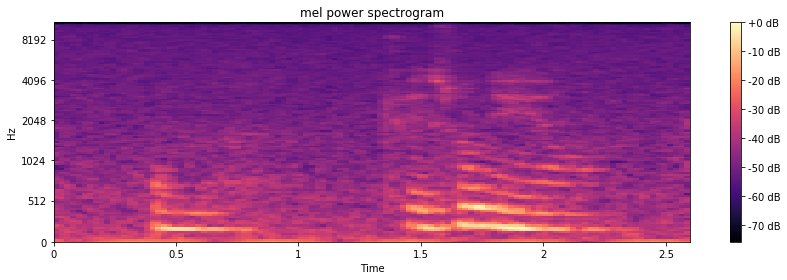

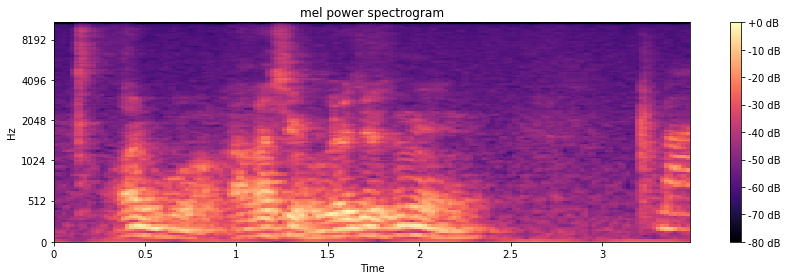

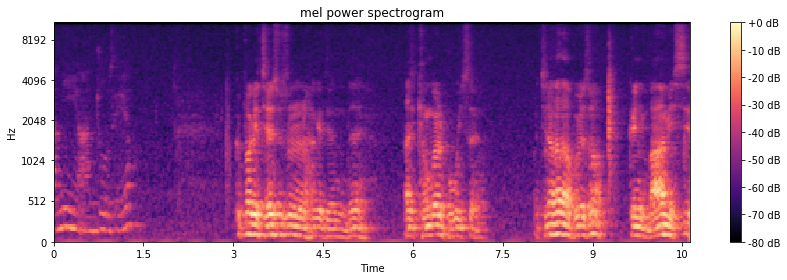

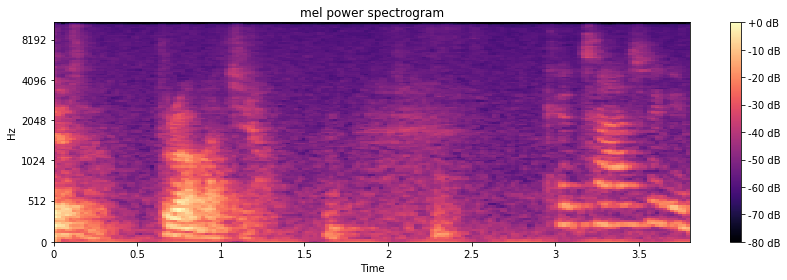

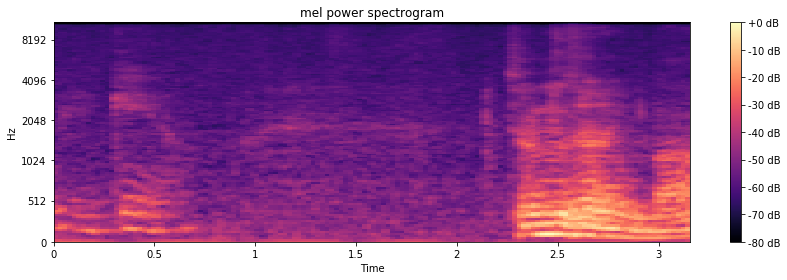

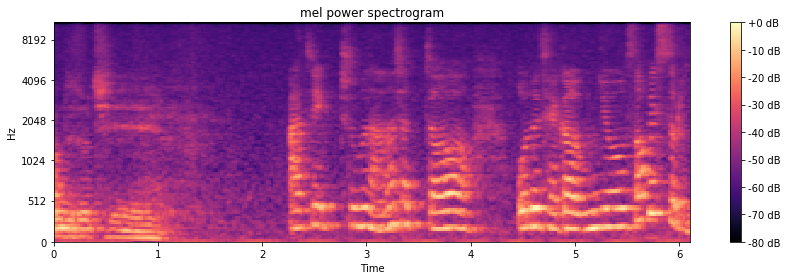

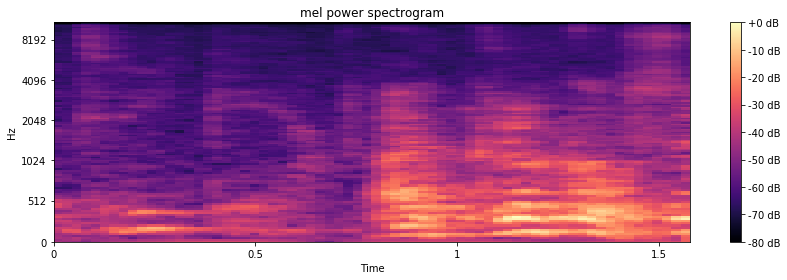

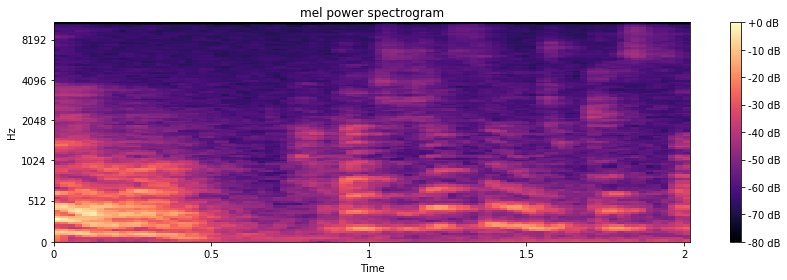

In [209]:
1478894
k= 0
new_arr = []
all_arr = []


for i in range(len(y)):
    new_arr.append(y[i])
    if(i==frame_info[k]):
        all_arr.append(new_arr)
        print(len(new_arr))
        new_arr = []
        if(k<len(frame_info)-1):
            k = k+1
all_arr = np.asarray(all_arr) 

            
S = []
# Let's make and display a mel-scaled power (energy-squared) spectrogram
for i in range(len(all_arr)):
    S = librosa.feature.melspectrogram(np.asarray(all_arr[i]), sr=sr, n_mels=128)
    print(S.shape)
    S_.append(S)
    
    # Convert to log scale (dB). We'll use the peak power (max) as reference.
    log_S = librosa.power_to_db(S, ref=np.max)

    print(log_S.shape)

    # Make a new figure
    plt.figure(figsize=(12,4))

    # Display the spectrogram on a mel scale
    # sample rate and hop length parameters are used to render the time axis
    librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

    # Put a descriptive title on the plot
    plt.title('mel power spectrogram')

    # draw a color bar
    plt.colorbar(format='%+02.0f dB')

    # Make the figure layout compact
    plt.tight_layout()
    S = []

In [ ]:
# padding 등 고려 방법만 확정
# data loader -> 다른팀 형식 고려 안해도 되나
# 언어 기준으로 자른것 이므로 순간순간으로 하려면... 몇초간격으로 할것이냐
#

def create_tfrecord(dataset_list):
    print("Start converting...")
    options = tf.python_io.\
        TFRecordOptions(compression_type=tf.python_io.TFRecordCompressionType.GZIP)
    writer = tf.python_io.TFRecordWriter(\
        path="tfrecord/tfrecord_practice.tfrecords",
        options=options
    )
    for dataset in dataset_list:
        audio_file_path = dataset["audio_file_path"]
        script_file_path = dataset["script_file_path"]
        
        # 데이터셋을 미리 전처리하여 TFRecord로 저장
        audio = audio_process.get_audio(audio_file_path)
        
        script = get_script(script_file_path)
        script = script_pad(script)
        
        example = tf.train.Example(
            features=tf.train.Features(
                feature={
                    "audio": _bytes_feature(audio.tostring()),
                    "script": _bytes_feature(script.encode("utf-8")) # string 타입을 bytes 타입으로 변환
                }
            )
        )
        writer.write(example.SerializeToString())
    
    writer.close()
    print("Done...")